In [2]:
import importlib
import sys
sys.path.append('../src')

import qa
importlib.reload(qa)
import qa
from plot import plot_from_file

import pickle
import numpy as np
import pandas as pd

import re
import random
import ast

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Plotting workspace

In [ ]:
PATH = '../data/MMLU-Pro/sample_results/mmlu_list_ad.pkl'
results = pickle.load(open(PATH, 'rb'))
accuracy = [r['r^org']==r['answer'] for r in results]
conf = [r['p_r^org'] for r in results]



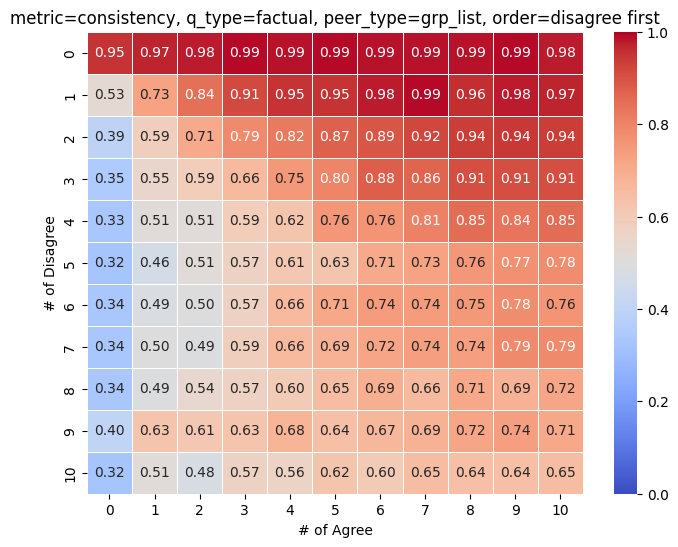

In [5]:
PATH = '../data/MMLU-Pro/sample_results/mmlu_list_da.pkl'
plot_from_file(PATH, metric = 'consistency', vlimit=(0,1))


# Data Generation

## MMLU

In [ ]:
# from datasets import load_dataset

# ds = load_dataset("TIGER-Lab/MMLU-Pro")

# mmlu = {}
# for ele in ds['test']:
#     if ele['category'] not in mmlu:
#         mmlu[ele['category']] = []
#     mmlu[ele['category']].append(ele)

# import random

# # mmlu_samples = []
# # for cat in mmlu:
# #     mmlu_samples.extend(random.Random(0).sample(mmlu[cat], 10))

# # with open('../data/mmlu_samples_140.pkl', 'wb') as f:
# #     pickle.dump(mmlu_samples, f)

# mmlu_full = []
# for cat in mmlu:
#     mmlu_full.extend(mmlu[cat])
    
# with open('../data/MMLU-Pro/results/mmlu_full.pkl', 'wb') as f:
#     pickle.dump(mmlu_full, f)

# print("total number of questions in MMLU-Pro:", len(mmlu_full))

# res_oqa_org = qa.qa_eval_org(mmlu_full)

# with open('../data/MMLU-Pro/results/mmlu_org.pkl', 'wb') as f:
#     pickle.dump(res_oqa_org, f)

/home/jch0/.conda/envs/jch0/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating validation split: 100%|██████████| 70/70 [00:00<00:00, 19347.70 examples/s]


total number of questions in MMLU-Pro: 12032


Processing MMLU: 100%|██████████| 12032/12032 [03:19<00:00, 60.35it/s] 


In [ ]:
# with open('../data/MMLU-Pro/results/mmlu_org.pkl', 'rb') as f:
#     res_mmlu_org = pickle.load(f)

# type_names = ['1st', '2nd', 'rnd', 'lst']
# for disagree_type in type_names:
#     results = qa.qa_eval_one(res_mmlu_org, disagree_type)

#     with open(f'../data/MMLU-Pro/results/mmlu_one_{disagree_type}.pkl', 'wb') as f:
#         pickle.dump(results, f)

Processing MMLU: 100%|██████████| 12032/12032 [03:22<00:00, 59.41it/s] 


In [4]:
with open('../data/MMLU-Pro/sample_results/mmlu_org.pkl', 'rb') as f:
    res_mmlu_org = pickle.load(f)


input_feat_list = []
for disagree_size in range(11): # row
    input_row = []
    for agree_size in range(11): # column
        
        eval_feat = {
            'type': 'grp_list',
            'agree_size': agree_size,
            'disagree_size': disagree_size,
            'disagree_type': '2nd',
            'q_type': 'factual',
            'order': 'da'
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.qa_eval_matrix(res_mmlu_org, input_feat_list)

with open('../data/MMLU-Pro/sample_results/mmlu_list_da.pkl', 'wb') as f:
    pickle.dump(results, f)


Processing grp_list samples...


Processing QA: 100%|██████████| 16940/16940 [04:25<00:00, 63.74it/s] 


In [ ]:
with open('../data/MMLU-Pro/sample_results/res_mmlu_org.pkl', 'rb') as f:
    res_mmlu_org = pickle.load(f)


input_feat_list = []
for group_size in [4,12,50,100,1000]: # row
    input_row = []
    for agree_ratio in [0, 0.25, 0.50, 0.75, 1]: # column
        
        eval_feat = {
            'type': 'grp_ratio',
            'group_size': group_size,
            'disagree_ratio': 1-agree_ratio,
            'disagree_type': '2nd',
            'q_type': 'factual',
            'order': 'ad'
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.qa_eval_matrix(res_mmlu_org, input_feat_list)
    #     result, accuracy = qa.qa_eval_matrix(res_mmlu_org, eval_feat)
    #     output_row.append(accuracy)
    # output_list.append(output_row)

# round a 2d np array
accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])

with open('../data/MMLU-Pro/sample_results/mmlu_ratio_ad.pkl', 'wb') as f:
    pickle.dump(results, f)


### Reason Generation and Reason in-context

In [ ]:
# with open('../data/MMLU-Pro/sample_results/res_mmlu_org.pkl', 'rb') as f:
#     res_mmlu_org = pickle.load(f)

# mmlu_org_reason = qa.qa_generate_reason(res_mmlu_org, '2nd', 10)

# with open('../data/MMLU-Pro/sample_results/mmlu_org_reason.pkl', 'wb') as f:
#     pickle.dump(mmlu_org_reason, f)

Generating reasons: 100%|██████████| 2800/2800 [05:15<00:00,  8.86it/s]


In [ ]:
with open('../data/MMLU-Pro/sample_results/mmlu_org_reason.pkl', 'rb') as f:
    mmlu_org_reason = pickle.load(f)

input_feat_list = []
for disagree_size in range(11): # row
    input_row = []
    for agree_size in range(11): # column
        
        eval_feat = {
            'type': 'grp_disc',
            'use_reason': True,
            'agree_size': agree_size,
            'disagree_size': disagree_size,
            'disagree_type': '2nd',
            'q_type': 'factual',
            'order': 'da'
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.qa_eval_matrix(mmlu_org_reason, input_feat_list)

# round a 2d np array
accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])

with open('../data/MMLU-Pro/sample_results/mmlu_reason_da.pkl', 'wb') as f:
    pickle.dump(results, f)



Processing grp_discrete samples...


Processing QA: 100%|██████████| 16940/16940 [06:27<00:00, 43.67it/s] 


### bar plot for self-confidence vs consistency

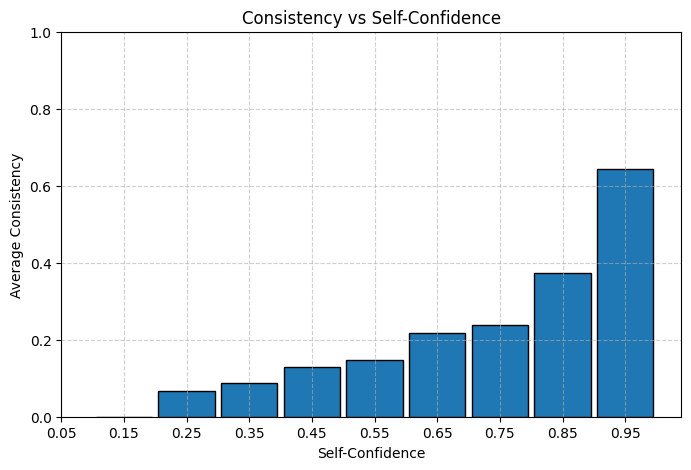

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load data
PATH = '../data/MMLU-Pro/results/mmlu_one_2nd.pkl'
with open(PATH, 'rb') as f:
    results = pickle.load(f)

# Extract accuracy and confidence
accuracy = np.array([r['r'] == r['answer'] for r in results])
consistency = np.array([r['r'] == r['r^org'] for r in results])
self_conf = np.array([r['p_r^org'] for r in results])
other_conf = np.array([r['p_r_j'] for r in results])

# Bin confidence scores into 10 bins from 0 to 1
bins = np.linspace(0, 1, 11)
bin_indices = np.digitize(self_conf, bins) - 1  # Adjust bin index to start at 0

# Calculate average accuracy for each bin
bin_accuracy = []
bin_centers = []

for i in range(10):
    indices = bin_indices == i
    if np.any(indices):
        avg_acc = consistency[indices].mean()
    else:
        avg_acc = np.nan
    bin_accuracy.append(avg_acc)
    bin_centers.append((bins[i] + bins[i+1]) / 2)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, bin_accuracy, width=0.09, edgecolor='black')
plt.xlabel('Self-Confidence')
plt.ylabel('Average Consistency')
plt.title('Consistency vs Self-Confidence')
plt.xticks(np.round(bin_centers, 2))
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

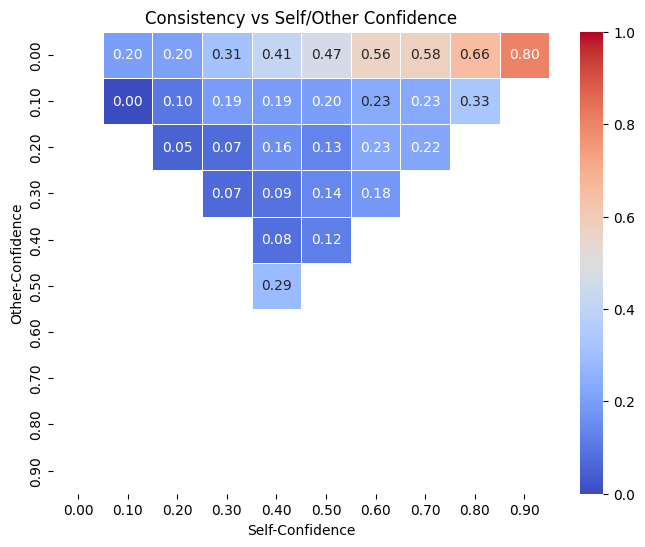

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
results = []
type_names = ['2nd', 'rnd', 'lst']
for type_name in type_names:
    PATH = f'../data/MMLU-Pro/results/mmlu_one_{type_name}.pkl'
    with open(PATH, 'rb') as f:
        results.extend(pickle.load(f))

# Extract accuracy and confidence
accuracy = np.array([r['r'] == r['answer'] for r in results])
consistency = np.array([r['r'] == r['r^org'] for r in results])
self_conf = np.array([r['p_r^org'] for r in results])
other_conf = np.array([r['p_r_j'] for r in results])

# Bin confidence scores into 10 bins from 0 to 1
bins = np.linspace(0, 1, 11)
row_bin_indices = np.digitize(other_conf, bins) - 1  # Adjust bin index to start at 0
col_bin_indices = np.digitize(self_conf, bins) - 1

accuracy = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        indices = (row_bin_indices == i) & (col_bin_indices == j)
        if np.any(indices):
            avg_acc = consistency[indices].mean()
        else:
            avg_acc = np.nan
        accuracy[i, j] = avg_acc

row_labels = ['{:.2f}'.format(i/10) for i in range(10)]
col_labels = ['{:.2f}'.format(i/10) for i in range(10)]
x_label = 'Self-Confidence'
y_label = 'Other-Confidence'
title = 'Consistency vs Self/Other Confidence'
vlimit = (0, 1)
df = pd.DataFrame(accuracy, index=row_labels, columns=col_labels)

plt.figure(figsize=(8, 6))

if vlimit:
    vmin, vmax = vlimit
    sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=vmin, vmax=vmax)
else:
    sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.show()


### Education

In [ ]:
# with open('../data/MMLU-Pro/results/mmlu_org.pkl', 'rb') as f:
#     res_mmlu_org = pickle.load(f)

# results = qa.qa_eval_education(res_mmlu_org, '2nd')

# with open(f'../data/MMLU-Pro/results/mmlu_edu_2nd.pkl', 'wb') as f:
#     pickle.dump(results, f)




Processing QA: 100%|██████████| 36096/36096 [08:21<00:00, 71.91it/s] 


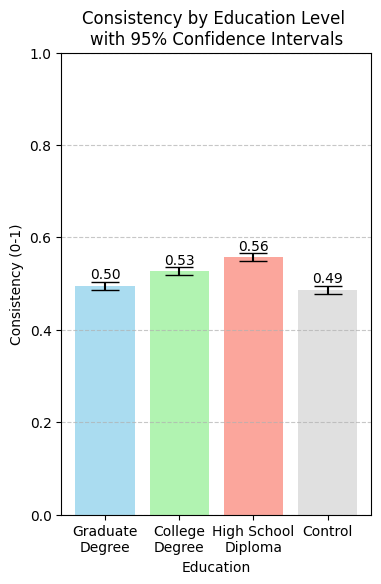

In [ ]:
with open('../data/MMLU-Pro/results/mmlu_edu_2nd.pkl', 'rb') as f:
    results = pickle.load(f)

with open('../data/MMLU-Pro/results/mmlu_one_2nd.pkl', 'rb') as f:
    res_mmlu_one = pickle.load(f)

results_graduate = results['graduate degree']
results_college = results['college degree']
results_high_school = results['high school diploma']
results_control = res_mmlu_one

consistence_graduate  = np.array([r['r'] == r['r^org'] for r in results_graduate])
consistence_college   = np.array([r['r'] == r['r^org'] for r in results_college])
consistence_high_school = np.array([r['r'] == r['r^org'] for r in results_high_school])
consistence_control = np.array([r['r'] == r['r^org'] for r in results_control])

# Calculate means and confidence intervals
education_groups = [consistence_graduate, consistence_college, consistence_high_school, consistence_control]
mean_consistance = [group.mean() for group in education_groups]
confidence_intervals = [stats.t.interval(
    0.95, len(group)-1, loc=group.mean(), scale=stats.sem(group)) for group in education_groups]

# Extracting lower and upper bounds for plotting
ci_lower = [mean - ci[0] for mean, ci in zip(mean_consistance, confidence_intervals)]
ci_upper = [ci[1] - mean for mean, ci in zip(mean_consistance, confidence_intervals)]

education_levels = ['Graduate\nDegree', 'College\nDegree', 'High School\nDiploma', 'Control']

# Plotting with confidence intervals
plt.figure(figsize=(4, 6))
plt.bar(education_levels, mean_consistance, yerr=[ci_lower, ci_upper], capsize=10,
        color=['skyblue', 'lightgreen', 'salmon', 'lightgray'], alpha=0.7)
plt.ylabel('Consistency (0-1)')
plt.xlabel('Education')
plt.title('Consistency by Education Level \nwith 95% Confidence Intervals')
plt.ylim(0, 1)

# Display values on the bars
for i, val in enumerate(mean_consistance):
    plt.text(i, val + max(ci_upper)*1, f'{val:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### in/out-domain

In [4]:
# with open('../data/MMLU-Pro/results/mmlu_org.pkl', 'rb') as f:
#     res_mmlu_org = pickle.load(f)

# results = qa.qa_eval_domain(res_mmlu_org, '2nd')

# with open(f'../data/MMLU-Pro/results/mmlu_domain_2nd.pkl', 'wb') as f:
#     pickle.dump(results, f)


Processing QA: 100%|██████████| 24064/24064 [05:37<00:00, 71.21it/s] 


In [ ]:
# domains = set()
# for ele in res_mmlu_org:
#     domains.add(ele['category'])

# print("total number of domains in MMLU-Pro:", len(domains))
# print("domains in MMLU-Pro:", domains)

total number of domains in MMLU-Pro: 14
domains in MMLU-Pro: {'math', 'engineering', 'physics', 'computer science', 'chemistry', 'psychology', 'law', 'economics', 'philosophy', 'history', 'biology', 'other', 'business', 'health'}


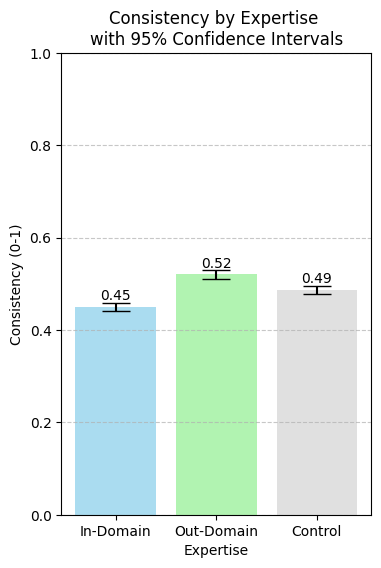

In [5]:
with open('../data/MMLU-Pro/results/mmlu_domain_2nd.pkl', 'rb') as f:
    results = pickle.load(f)

with open('../data/MMLU-Pro/results/mmlu_one_2nd.pkl', 'rb') as f:
    res_mmlu_one = pickle.load(f)

results_in_domain = results['in_domain']
results_out_domain = results['out_domain']
results_control = res_mmlu_one

consistence_in_domain  = np.array([r['r'] == r['r^org'] for r in results_in_domain])
consistence_out_domain   = np.array([r['r'] == r['r^org'] for r in results_out_domain])
consistence_control = np.array([r['r'] == r['r^org'] for r in results_control])

# Calculate means and confidence intervals
domain_groups = [consistence_in_domain, consistence_out_domain, consistence_control]
mean_consistance = [group.mean() for group in domain_groups]
confidence_intervals = [stats.t.interval(
    0.95, len(group)-1, loc=group.mean(), scale=stats.sem(group)) for group in domain_groups]

# Extracting lower and upper bounds for plotting
ci_lower = [mean - ci[0] for mean, ci in zip(mean_consistance, confidence_intervals)]
ci_upper = [ci[1] - mean for mean, ci in zip(mean_consistance, confidence_intervals)]

in_out_domain = ['In-Domain', 'Out-Domain', 'Control']

# Plotting with confidence intervals
plt.figure(figsize=(4, 6))
plt.bar(in_out_domain, mean_consistance, yerr=[ci_lower, ci_upper], capsize=10,
        color=['skyblue', 'lightgreen', 'lightgray'], alpha=0.7)
plt.ylabel('Consistency (0-1)')
plt.xlabel('Expertise')
plt.title('Consistency by Expertise \nwith 95% Confidence Intervals')
plt.ylim(0, 1)

# Display values on the bars
for i, val in enumerate(mean_consistance):
    plt.text(i, val + max(ci_upper)*1, f'{val:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## GPQA

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
hf_token = input("Enter your Hugging Face token: ")
ds = load_dataset("Idavidrein/gpqa", "gpqa_diamond", token = hf_token)

Using the latest cached version of the dataset since Idavidrein/gpqa couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'gpqa_diamond' at /home/jch0/.cache/huggingface/datasets/Idavidrein___gpqa/gpqa_diamond/0.0.0/90b8e5be2b1d3d2dbfe016cdab47981150600c4a (last modified on Wed Apr 30 08:52:17 2025).


In [55]:

gpqa_full = []
for q_idx, ele in enumerate(ds['train']):
    input_ele = {}
    input_ele['question_id'] = q_idx
    input_ele['category'] = ele['High-level domain']
    input_ele['question'] = ele['Question']
    choices = [ele['Correct Answer'], ele['Incorrect Answer 1'], ele['Incorrect Answer 2'], ele['Incorrect Answer 3']]
    random.Random(q_idx).shuffle(choices)
    input_ele['options'] = choices
    input_ele['answer'] = 'ABCD'[choices.index(ele['Correct Answer'])]

    gpqa_full.append(input_ele)

with open('../data/GPQA/results/full.pkl', 'wb') as f:
    pickle.dump(gpqa_full, f)

print("total number of questions in GPQA:", len(gpqa_full))

res_gpqa_org = qa.qa_eval_org(gpqa_full)

with open('../data/GPQA/results/org.pkl', 'wb') as f:
    pickle.dump(res_gpqa_org, f)

total number of questions in GPQA: 198


Processing QA: 100%|██████████| 198/198 [00:04<00:00, 41.37it/s]


In [ ]:
with open('../data/GPQA/results/gpqa_org.pkl', 'rb') as f:
    res_gpqa_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_gpqa_org, disagree_type)
    with open(f'../data/GPQA/results/gpqa_one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 198/198 [00:06<00:00, 30.46it/s]


## ARC-Challenge

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("allenai/ai2_arc", "ARC-Challenge")

In [37]:

arc_full = []
for q_idx, ele in enumerate(ds['test']):
    input_ele = {}
    input_ele['question_id'] = ele['id']
    # input_ele['category'] = ele['High-level domain']
    input_ele['question'] = ele['question']
    input_ele['options'] = ele["choices"]["text"]
    answer_key = ele["answerKey"]
    if answer_key not in "ABCDE":
        answer_key = "ABCDE"[int(answer_key)-1]
    input_ele['answer'] = answer_key

    arc_full.append(input_ele)

with open('../data/ARC/results/full.pkl', 'wb') as f:
    pickle.dump(arc_full, f)

print("total number of questions in ARC:", len(arc_full))

res_arc_org = qa.qa_eval_org(arc_full)

with open('../data/ARC/results/org.pkl', 'wb') as f:
    pickle.dump(res_arc_org, f)

total number of questions in ARC: 1172


Processing QA: 100%|██████████| 1172/1172 [00:16<00:00, 71.50it/s] 


In [38]:
with open('../data/ARC/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_org, disagree_type)
    with open(f'../data/ARC/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 1172/1172 [00:15<00:00, 73.90it/s] 


## OpinionQA

In [23]:
oqa_df = pd.DataFrame()
# get all file names under PATH
import os
PATH = '../data/OpinionQA/model_input/'
for file in os.listdir(PATH):
    if re.match(r'.+W\d{2}\.csv', file):
        target_df = pd.read_csv(PATH + file, delimiter='\t')
        target_df = target_df[["key", "question", "options"]]
        target_df.columns = ["question_id", "question", "options"]
        oqa_df = pd.concat([oqa_df, target_df], ignore_index=True)

question_id = oqa_df['question_id'].tolist()
question = oqa_df['question'].tolist()
options = oqa_df['options'].tolist()

oqa_list = []
for i in range(len(question_id)):
    oqa_list.append({"question_id": question_id[i], "question": question[i], "options": ast.literal_eval(options[i])})

print("total number of questions in OpinionQA:", len(oqa_list))
oqa_sample_list = random.Random(0).sample(oqa_list, 140)
print("total number of questions in OpinionQA sample:", len(oqa_sample_list))

# res_oqa_org = qa.qa_eval_org(oqa_sample_list)

# with open('../data/OpinionQA/sample_results/res_oqa_org.pkl', 'wb') as f:
#     pickle.dump(res_oqa_org, f)

res_oqa_org = qa.qa_eval_org(oqa_list)

with open('../data/OpinionQA/results/org.pkl', 'wb') as f:
    pickle.dump(res_oqa_org, f)

total number of questions in OpinionQA: 1506
total number of questions in OpinionQA sample: 140


Processing QA: 100%|██████████| 1506/1506 [00:30<00:00, 49.07it/s]


In [24]:
with open('../data/OpinionQA/results/org.pkl', 'rb') as f:
    res_oqa_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_oqa_org, disagree_type)
    with open(f'../data/OpinionQA/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 1506/1506 [00:44<00:00, 34.16it/s]


In [ ]:
with open('../data/OpinionQA/sample_results/res_oqa_org.pkl', 'rb') as f:
    res_oqa_org = pickle.load(f)


input_feat_list = []
for disagree_size in range(11): # row
    input_row = []
    for agree_size in range(11): # column
        
        eval_feat = {
            'type': 'grp_count',
            'agree_size': agree_size,
            'disagree_size': disagree_size,
            'disagree_type': '2nd',
            'order': 'ad',
            'q_type': 'opinion'
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.qa_eval_matrix(res_oqa_org, input_feat_list)

# round a 2d np array
accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])

with open('../data/OpinionQA/sample_results/oqa_count_ad.pkl', 'wb') as f:
    pickle.dump(results, f)



Processing grp_count samples...


Processing MMLU: 100%|██████████| 16940/16940 [04:57<00:00, 56.99it/s] 


### Reason Generation and Reason in-context

In [18]:
with open('../data/OpinionQA/sample_results/oqa_org.pkl', 'rb') as f:
    res_oqa_org = pickle.load(f)

oqa_org_reason = qa.qa_generate_reason(res_oqa_org, '2nd', 10)

with open('../data/OpinionQA/sample_results/oqa_org_reason.pkl', 'wb') as f:
    pickle.dump(oqa_org_reason, f)

Generating reasons: 100%|██████████| 2800/2800 [02:23<00:00, 19.56it/s]


In [25]:
with open('../data/OpinionQA/sample_results/oqa_org_reason.pkl', 'rb') as f:
    oqa_org_reason = pickle.load(f)

for order in ['ad', 'da']:
    input_feat_list = []
    for disagree_size in range(11): # row
        input_row = []
        for agree_size in range(11): # column
            
            eval_feat = {
                'type': 'grp_disc',
                'use_reason': False,
                'agree_size': agree_size,
                'disagree_size': disagree_size,
                'disagree_type': '2nd',
                'q_type': 'opinion',
                'order': order
            }
            input_row.append(eval_feat)
        input_feat_list.append(input_row)

    results, accuracy = qa.qa_eval_matrix(mmlu_org_reason, input_feat_list)

    # round a 2d np array
    accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])

    with open(f'../data/OpinionQA/sample_results/oqa_disc_{order}.pkl', 'wb') as f:
        pickle.dump(results, f)



Processing grp_disc samples...


Processing QA: 100%|██████████| 16940/16940 [05:27<00:00, 51.78it/s] 


Processing grp_disc samples...


Processing QA: 100%|██████████| 16940/16940 [05:18<00:00, 53.18it/s] 


## SIQA

In [52]:
# load jsonl
import json
PATH = '../data/SIQA/raw/socialiqa-train-dev/dev.jsonl'
answer_PATH = '../data/SIQA/raw/socialiqa-train-dev/dev-labels.lst'
with open(PATH, 'r') as f:
    siqa_list = [json.loads(line) for line in f]

with open(answer_PATH, 'r') as f:
    answers = [line.strip() for line in f]

siqa_full = []
for i, ele in enumerate(siqa_list):
    input_ele = {}
    input_ele['question_id'] = i
    input_ele['question'] = ele['context'] + ' ' + ele['question']
    input_ele['options'] = [ele['answerA'], ele['answerB'], ele['answerC']]
    input_ele['answer'] = "ABC"[int(answers[i])-1]

    siqa_full.append(input_ele)

with open('../data/SIQA/results/full.pkl', 'wb') as f:
    pickle.dump(siqa_full, f)

print("total number of questions in SIQA:", len(siqa_full))

res_org = qa.qa_eval_org(siqa_full)

with open('../data/SIQA/results/org.pkl', 'wb') as f:
    pickle.dump(res_org, f)

total number of questions in SIQA: 1954


Processing QA: 100%|██████████| 1954/1954 [00:26<00:00, 74.18it/s] 


In [56]:
with open('../data/SIQA/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_org, disagree_type)
    with open(f'../data/SIQA/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 1954/1954 [00:27<00:00, 72.22it/s] 


## ETHICS

In [61]:
df_raw = pd.read_csv('../data/ETHICS/raw/cm_test.csv')

In [64]:
ethics_full = []
for i, row in df_raw.iterrows():
    input_ele = {}
    input_ele['question_id'] = i
    input_ele['question'] = "Question: Would most people believe this reasonable or unreasonable to say?\n" + row['input'] 
    choices = ['reasonable', 'unreasonable']
    random.Random(i).shuffle(choices)
    input_ele['options'] = choices
    label = row['label']
    label_text = ['reasonable', 'unreasonable'][label]
    true_label = choices.index(label_text)
    answer = 'AB'[true_label]
    input_ele['answer'] = answer

    ethics_full.append(input_ele)

In [67]:
with open('../data/ETHICS/results/full.pkl', 'wb') as f:
    pickle.dump(ethics_full, f)

print("total number of questions in ETHICS:", len(ethics_full))

res_org = qa.qa_eval_org(ethics_full)

with open('../data/ETHICS/results/org.pkl', 'wb') as f:
    pickle.dump(res_org, f)

total number of questions in ETHICS: 3885


Processing QA: 100%|██████████| 3885/3885 [01:20<00:00, 48.15it/s]


In [68]:
with open('../data/ETHICS/results/org.pkl', 'rb') as f:
    res_org = pickle.load(f)

type_names = ['1st', '2nd', 'rnd', 'lst']

for disagree_type in type_names:
    results = qa.qa_eval_one(res_org, disagree_type)
    with open(f'../data/ETHICS/results/one_{disagree_type}.pkl', 'wb') as f:
        pickle.dump(results, f)

Processing QA: 100%|██████████| 3885/3885 [01:08<00:00, 56.37it/s]


# Experiment

## diff in self/peer confidence or objective/subjective

In [ ]:
objective_results = []
subjective_results = []
for benchmark in ["OpinionQA", "SIQA", "ETHICS"]:
    for disagree_type in ['2nd', 'rnd', 'lst']:
        PATH = f'../data/{benchmark}/results/one_{disagree_type}.pkl'
        with open(PATH, 'rb') as f:
            subjective_results.extend(pickle.load(f))

for benchmark in ["MMLU-Pro", "GPQA", "ARC"]:
    for disagree_type in ['2nd', 'rnd', 'lst']:
        PATH = f'../data/{benchmark}/results/one_{disagrsee_type}.pkl'
        with open(PATH, 'rb') as f:
            objective_results.extend(pickle.load(f))


In [70]:
df_objective = pd.DataFrame()
df_objective["p_r^org"] = [r['p_r^org'] for r in objective_results]
df_objective["p_r_j"] = [r['p_r_j'] for r in objective_results]
df_objective["change"] = [r['r'] == r['r_j'] for r in objective_results]
df_objective["task"] = "objective"

df_subjective = pd.DataFrame()
df_subjective["p_r^org"] = [r['p_r^org'] for r in subjective_results]
df_subjective["p_r_j"] = [r['p_r_j'] for r in subjective_results]
df_subjective["change"] = [r['r'] == r['r_j'] for r in subjective_results]
df_subjective["task"] = "subjective"

df_all = pd.concat([df_objective, df_subjective], ignore_index=True)
df_all["diff_p"] = df_all["p_r^org"] - df_all["p_r_j"]

In [72]:
import pandas as pd
import statsmodels.formula.api as smf

# Convert 'change' to integer (0/1)
df_all['change'] = df_all['change'].astype(int)

# Ensure 'task' is a categorical variable
df_all['task'] = df_all['task'].astype('category')

# Fit logistic regression model
model = smf.logit(formula='change ~ diff_p + task', data=df_all).fit()

# Show summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.419697
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 change   No. Observations:                62241
Model:                          Logit   Df Residuals:                    62238
Method:                           MLE   Df Model:                            2
Date:                Thu, 01 May 2025   Pseudo R-squ.:                  0.1948
Time:                        00:15:27   Log-Likelihood:                -26122.
converged:                       True   LL-Null:                       -32441.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.6942      0.031     55.403      0.000       1.634       1.754
task[

Optimization terminated successfully.
         Current function value: 0.418700
         Iterations 6


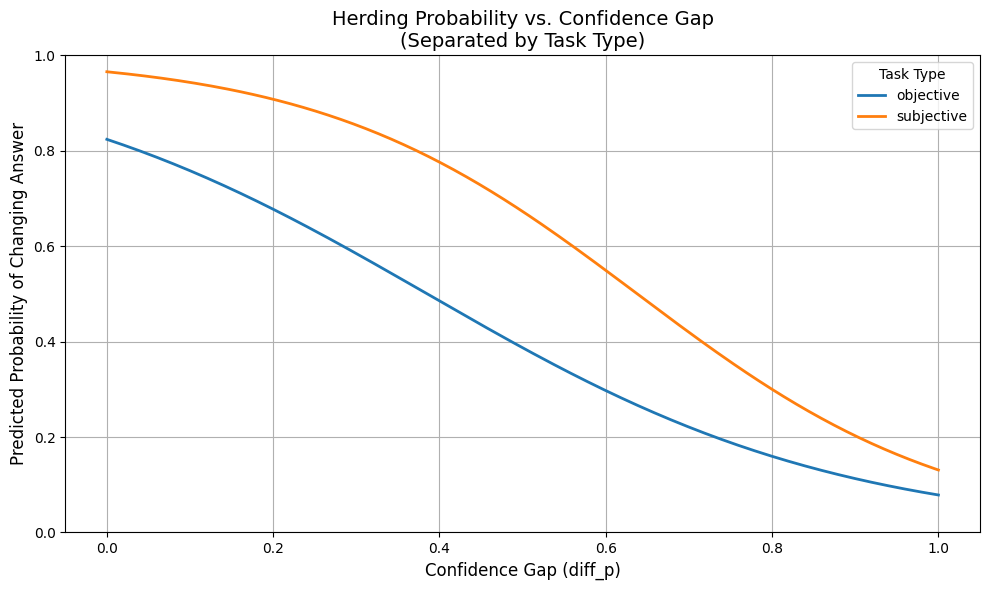

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Ensure correct types
df_all['task'] = df_all['task'].astype('category')

# Fit the logistic regression model with interaction
model = smf.logit(formula='change ~ diff_p * task', data=df_all).fit()

# Create prediction data
diff_p_vals = np.linspace(0, 1, 200)
task_types = ['objective', 'subjective']

# Build prediction DataFrame
predict_df = pd.DataFrame([
    {'diff_p': dp, 'task': task}
    for task in task_types
    for dp in diff_p_vals
])

# Get predicted probabilities
predict_df['predicted_change_prob'] = model.predict(predict_df)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=predict_df, x='diff_p', y='predicted_change_prob', hue='task', linewidth=2)
plt.xlabel("Confidence Gap (diff_p)", fontsize=12)
plt.ylabel("Predicted Probability of Changing Answer", fontsize=12)
plt.title("Herding Probability vs. Confidence Gap\n(Separated by Task Type)", fontsize=14)
plt.ylim(0, 1)
plt.grid(True)
plt.legend(title='Task Type')
plt.tight_layout()
plt.show()